#Primer Entrega Mentoría Cambio climático y ML

En esta primera entrega vamos hacer una descripción y primer análisis del dataset provisto cuyo fin es responder el siguiente interrogante: cómo mitigar las emisiones de CO<sub>2</sub> mediante la reducción del consumo energético en construcciones edilicias.

 Intentaremos predecir el consumo energético de las edificaciones utilizando un set de datos que contempla algunas características de edificios ubicados en la costa NE de Estados Unidos (mayormente, Nueva York) junto con datos climáticos y meteorológicos de los sitios donde dichos edificios están emplazados.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

## Descripción de la entrega

 En esta entrega realizaremos los siguientes pasos:
- Lectura del dataset alojado en repositorio Git-Hub. Descripción de los features o columnas. Descripción de la variable target.
- Búsqueda de valores faltantes.
- Búsqueda de valores ruidosos o atípicos. Descripción de las distribuciones.
- Búsqueda de correlaciones entre variables.

En cada uno de estos items, se propondrá una forma de tratamiento a realizarse en la segunda entrega.

In [ ]:
energy_df = pd.read_csv('https://raw.githubusercontent.com/TamaraMaggioni/Cambio-climatico-y-ML/main/energy.csv')

energy_df

,Unnamed: 0,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,...,fall_average_temp,spring_average_temp,winter_average_maxtemp,summer_average_maxtemp,fall_average_maxtemp,spring_average_maxtemp,winter_average_mintemp,summer_average_mintemp,fall_average_mintemp,spring_average_mintemp
0,0,Food,61242.0,1942.0,11.0,2.4,115,2960,16.59,0.0,...,60.488710,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
1,1,Warehouse,274000.0,1955.0,45.0,1.8,115,2960,16.59,0.0,...,60.488710,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
2,2,Commercial,280025.0,1951.0,97.0,1.8,115,2960,16.59,0.0,...,60.488710,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
3,3,Educational,55325.0,1980.0,46.0,1.8,115,2960,16.59,0.0,...,60.488710,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
4,4,Warehouse,66000.0,1985.0,100.0,2.4,115,2960,16.59,0.0,...,60.488710,55.349462,70.666667,86.333333,81.666667,80.666667,35.666667,51.333333,47.333333,42.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,75752,Office,20410.0,1995.0,8.0,36.6,260,3772,45.03,1.4,...,56.023297,54.938351,57.000000,89.666667,72.666667,82.666667,28.666667,51.000000,41.000000,40.000000
75753,75753,Residential,40489.0,1910.0,98.0,36.6,260,3772,45.03,1.4,...,56.023297,54.938351,57.000000,89.666667,72.666667,82.666667,28.666667,51.000000,41.000000,40.000000
75754,75754,Commercial,28072.0,1917.0,NaN,36.6,55,6218,106.32,36.6,...,48.698208,47.889068,50.666667,84.666667,64.666667,73.333333,23.666667,45.666667,37.333333,34.333333
75755,75755,Commercial,53575.0,2012.0,NaN,36.6,55,6218,106.32,36.6,...,48.698208,47.889068,50.666667,84.666667,64.666667,73.333333,23.666667,45.666667,37.333333,34.333333


Se elimina la columna índice, ya que no es necesaria para trabajar y se leen la totalidad de columnas.

In [ ]:
energy_df = energy_df.drop('Unnamed: 0', axis=1)
energy_df.columns

Index(['facility_type', 'floor_area', 'year_built', 'energy_star_rating',
       'ELEVATION', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F',
       'days_above_80F', 'days_above_90F', 'days_above_100F',
       'days_above_110F', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui', 'winter_average_temp', 'summer_average_temp',
       'fall_average_temp', 'spring_average_temp', 'winter_average_maxtemp',
       'summer_average_maxtemp', 'fall_average_maxtemp',
       'spring_average_maxtemp', 'winter_average_mintemp',
       'summer_average_mintemp', 'fall_average_mintemp',
       'spring_average_mintemp'],
      dtype='object')

La tabla posee 75757 entradas.

Las features son 35 y se las detalla a continuación.

Características de edificios:
- facility_type: Tipo de instalación. ---> *Categórica*
- floor_area: Superficie de piso [ft2]---> *Cuantitativa continua*
- year_built: Año de construcción ---> *Cuantitativa discreta*
- energy_star_rating:  Escala de eficiencia energética. Valores entre 0 y 100 ---> *Cuantitativa continua*
- ELEVATION: Altura [m] ---> *Cuantitativa continua*
- site_eui: energy use intensity. EUI expresa la energía utilizada en un edificio en función de su tamaño/superficie [kBTU/ft2] ---> *Cuantitativa continua*

Variables climáticas:
- cooling_degree_days: grados por encima de 65 °F de la temperatura media de un día. En el dataset se informa como acumulación anual. Es decir, se suman los grados de todos los días del año que cumplieron esa condición. [°F] --->  *Cuantitativa continua*
- heating_degree_days: grados por debajo de 65 °F de la temperatura media de un día. En el dataset se informa como acumulación anual. [°F] --->  *Cuantitativa continua*
- precipitation_inches: promedio de precipitaciones en pulgadas [in] ---> *Cuantitativa continua*
- snowfall_inches: promedio de nevadas en pulgadas [in]---> *Cuantitativa continua*
- snowdepth_inches: promedio del grosor de la capa de nieve en pulgadas [in]---> *Cuantitativa continua*
- days_below_30F: días bajo 30 grados Farenheit ---> *Cuantitativa continua*
- days_below_20F: días bajo 20 grados Farenheit ---> *Cuantitativa continua*
- days_below_10F: días bajo 10 grados Farenheit ---> *Cuantitativa continua*
- days_below_0F: días bajo 0 grados Farenheit ---> *Cuantitativa continua*
- days_above_80F: días sobre 80 grados Farenheit ---> *Cuantitativa continua*
- days_above_90F: días sobre 90 grados Farenheit ---> *Cuantitativa continua*
- days_above_100F: días sobre 100 grados Farenheit ---> *Cuantitativa continua*
- days_above_110F: días sobre 110 grados Farenheit ---> *Cuantitativa continua*
- direction_max_wind_speed: direccion para el viento con la velocidad máxima promedio. Coordenadas polares. Norte=360. ---> *Cuantitativa continua*
- direction_peak_wind_speed: direccion para el viento con velocidad máxima absoluta. Coordenadas polares. Norte=360. ---> *Cuantitativa continua*
- max_wind_speed: Máxima velocidad del viento ---> *Cuantitativa continua*
- days_with_fog: días con neblina ---> *Cuantitativa continua*
- winter_average_temp: temperatura promedio de invierno [°F]---> *Cuantitativa continua*
- summer_average_temp: temperatura promedio de verano [°F] ---> *Cuantitativa continua*
- fall_average_temp: temperatura promedio de otoño [°F] ---> *Cuantitativa continua*
- spring_average_temp: temperatura promedio de primavera [°F] ---> *Cuantitativa continua*
- winter_average_maxtemp: temperatura máxima promedio de
invierno [°F] ---> *Cuantitativa continua*
- summer_average_maxtemp: temperatura máxima promedio de verano [°F] ---> *Cuantitativa  continua*
- fall_average_maxtemp: temperatura máxima promedio de otoño [°F] ---> *Cuantitativa
 continua*
- spring_average_maxtemp: temperatura máxima promedio de primavera [°F] ---> *Cuantitativa continua*
- winter_average_mintemp: temperatura mínima promedio de invierno [°F] --->  *Cuantitativa  continua*
- summer_average_mintemp: temperatura mínima promedio de verano [°F] --->  *Cuantitativa continua*
- fall_average_mintemp: temperatura mínima promedio de otoño [°F] ---> *Cuantitativa continua*
- spring_average_mintemp: temperatura mínima promedio de primavera [°F] ---> *Cuantitativa continua*

Entre todas las variables, site_eui es la variable target ya que, tal como se menciona en la descripción, indica la cantidad de energía que necesita un edificio para su funcionamiento en relación a su superficie y, por lo tanto, es una medida directa del consumo energético del mismo, el cual se busca correlacionar.

Para facilitar el entendimiento de las variables, debido a que muchas variables se encuentran en unidades que no estamos familiarizados en Argentina, se cambiarán estas unidades por las utilizadas en el sistema internacional. También se propone hacer la traducción de variables del inglés al español para mayor comodidad y optimización de la comunicación.


###Búsqueda de datos faltantes.
En primer instancia indagaremos si todos los features están completos o existen datos faltantes.

<Axes: >

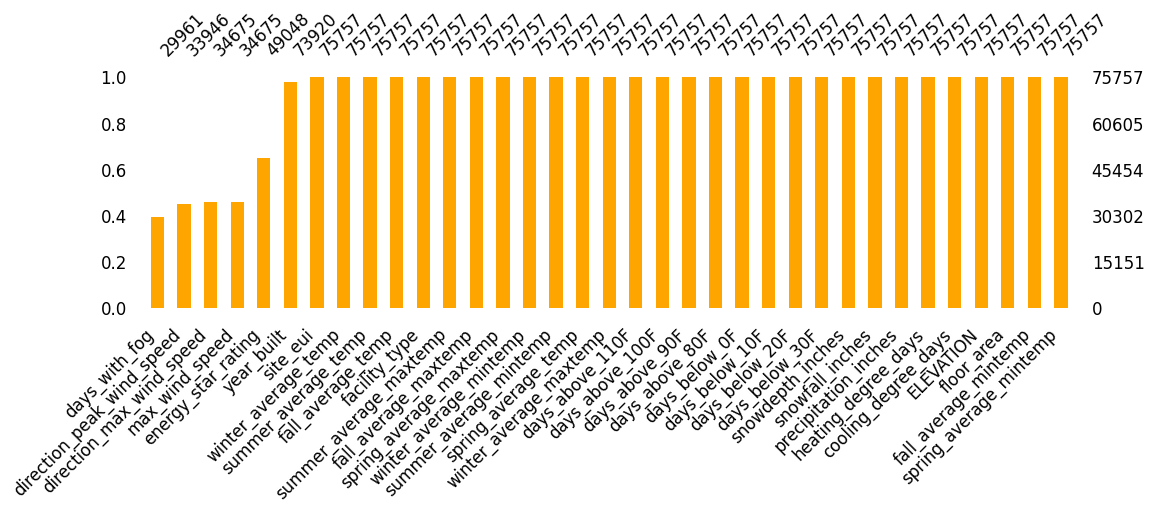

In [ ]:
import missingno as msno
msno.bar(energy_df,figsize=(12, 3), sort="ascending",fontsize=12, color = 'orange')

In [ ]:
missing_values_count = energy_df.isna().sum()
missing_values_count

facility_type                    0
floor_area                       0
year_built                    1837
energy_star_rating           26709
ELEVATION                        0
cooling_degree_days              0
heating_degree_days              0
precipitation_inches             0
snowfall_inches                  0
snowdepth_inches                 0
days_below_30F                   0
days_below_20F                   0
days_below_10F                   0
days_below_0F                    0
days_above_80F                   0
days_above_90F                   0
days_above_100F                  0
days_above_110F                  0
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
site_eui                         0
winter_average_temp              0
summer_average_temp              0
fall_average_temp                0
spring_average_temp              0
winter_average_maxtemp           0
summer_average_maxte

In [ ]:
# how many total missing values do we have?
total_cells = np.product(energy_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

7.479440843750412

Solo hay un 7.27% de datos faltantes en la totalidad del dataset.

Cuando analizamos el porcentaje de datos faltantes dentro de cada variable, se obtuvo el siguiente resultado:

| feature                   | %faltantes |
|---------------------------|------------|
| year_built                | 2,42       |
| energy_star_rating        | 35,26      |
| direction_max_wind_speed  | 54,23      |
| direction_peak_wind_speed | 55,19      |
| max_wind_speed            | 54,23      |
| days_with_fog             | 60,45      |

Podemos observar que hay sólo seis variables que presentan datos faltantes: "days_with_fog: días con neblina", "direction_peak_wind_speed",direction_max_wind_speed", "max_wind_speed: Máxima velocidad del viento", "energy_star_rating" y "year_built". Las primeras 4 tienen menos del 50% de los datos, mientras que "energy_star_rating" tiene más del 60% y "year_built" más del 95% de las observaciones.

Las posiciones de los datos faltantes en el dataset pueden visualizarse usando la matrix(). El gráfico aparece en blanco cuando faltan valores. También permite visualizar patrones de los datos faltantes, es decir, identificar variables que tengan el mismo comportamiento respecto a estos datos.

<Axes: >

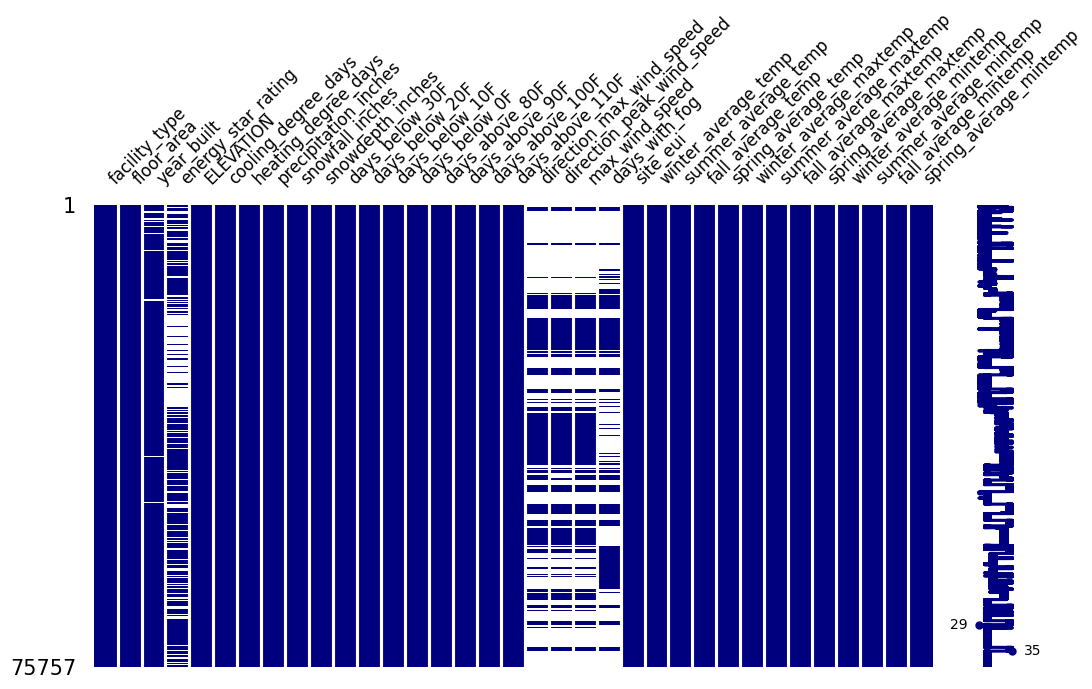

In [ ]:
msno.matrix(energy_df,figsize=(12, 6), fontsize=12, color=[0,0,0.5])


A simple vista se observa que las variables que estudian la presencia del viento tienen el mismo comportamiento y la presencia de neblina se comporta de forma similar; mientras que el año de construcción y el ranking de energía presentan estos datos de manera aleatoria respecto a las otras variables.


También se puede detectar correlación entre los datos faltantes usando Heatmap.

Este gráfico toma valores entre -1 y 1:

* El valor "-1" indica correlación negativa, lo que implica que si el valor de una variable está presente, en la otra esta ausente.

* El valor "0" indica falta de correlación.

* El valor "1" indica una correlación positiva, lo que implica que si una variable tiene valor, la otra definitivamente va a tomar un valor.

<Axes: >

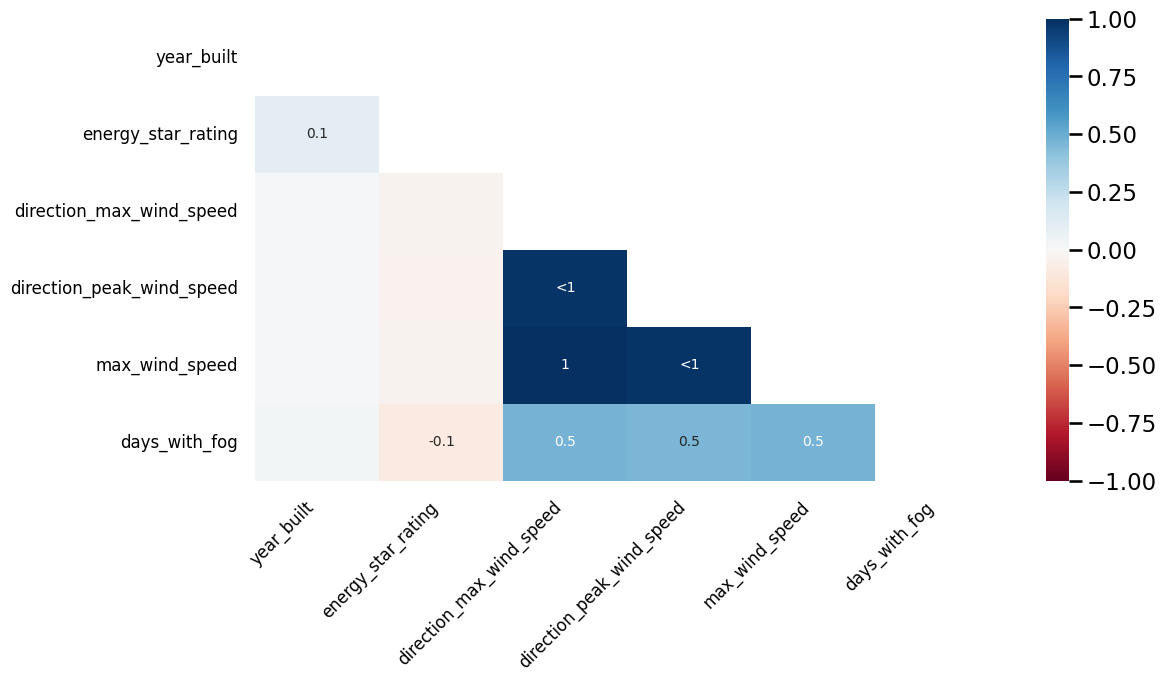

In [ ]:
msno.heatmap(energy_df,figsize=(12, 6), fontsize=12)

Con este grafico podemos comprobar efectivamente que el compartamiento de los datos faltantes no es aleatorio para las columnas sobre viento y neblina. Se visualizan correlaciones entre los datos faltantes de las variables  direction_max_wind_speed, max_wind_speed y direction_peak_wind_speed, los cuales muestran una correlación perfecta igual a 1, por lo que se puede suponer que son combinación lineal entre ellos.
Por otro lado, los datos faltantes de days_with_fog estan a la vez correlacionados con los faltantes de las variables recién mencionadas.

En base a todos los resultados sobre datos faltantes, decidimos que vamos a descartar las variables que tienen más del 50% de datos en blanco, es decir, las relacionadas al viento y a la neblina. En cuanto a las variables "year_built" y "energy_star_rating", realizaremos el proceso de imputación.


###Búsqueda de valores ruidosos o outliers. Descripción de distribuciones.

####Análisis de variable catégoricas

En el dataset existe una única variable catégorica que tiene la siguiente distribución

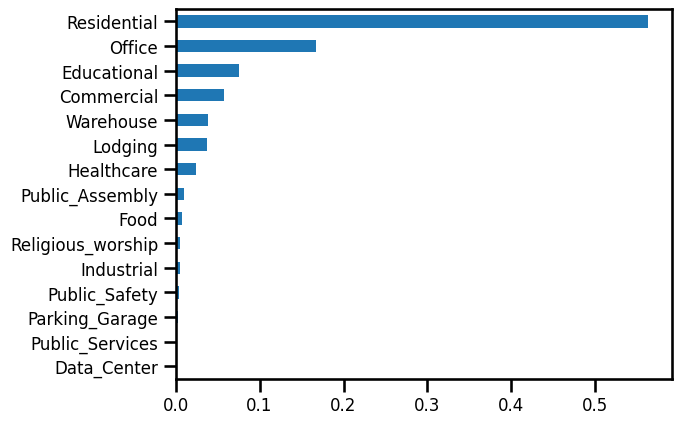

Residential          42630
Office               12703
Educational           5733
Commercial            4351
Warehouse             2879
Lodging               2847
Healthcare            1878
Public_Assembly        715
Food                   617
Religious_worship      399
Industrial             384
Public_Safety          275
Parking_Garage         251
Public_Services         68
Data_Center             27
Name: facility_type, dtype: int64

In [ ]:
energy_df['facility_type'].value_counts(ascending=True,normalize=True).plot.barh()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()
type_count = energy_df['facility_type'].value_counts()
type_count

In [ ]:
type_total = energy_df['facility_type'].count()

type_perc = type_count *100 / type_total

type_perc


Residential          56.272028
Office               16.768087
Educational           7.567618
Commercial            5.743364
Warehouse             3.800309
Lodging               3.758069
Healthcare            2.478979
Public_Assembly       0.943807
Food                  0.814446
Religious_worship     0.526684
Industrial            0.506884
Public_Safety         0.363003
Parking_Garage        0.331323
Public_Services       0.089761
Data_Center           0.035640
Name: facility_type, dtype: float64

Podríamos decir que aquellas categorias que representan menos del 1% de los datos, es decir menos de 758 ocurrencias pueden ser desestimadas.

####Análisis de variable numéricas

La mayoría de las variables de nuestro data set son numéricas. Para facilitar la visualización y análisis, decidimos agrupar las variables que tienen las mismas unidades y escalas similares. En este sentido, se armaron los siguientes subgrupos:
  - _"temp_variables"_:
  
  'winter_average_temp', 'summer_average_temp',
  'fall_average_temp', 'spring_average_temp', 'winter_average_maxtemp',
  'summer_average_maxtemp', 'fall_average_maxtemp',
  'spring_average_maxtemp', 'winter_average_mintemp',
  'summer_average_mintemp', 'fall_average_mintemp',
  'spring_average_mintemp',
  'cooling_degree_days',
  'heating_degree_days'
  - _"days_variables"_:          
  'cooling_degree_days' ,'heating_degree_days' , 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F'
  - _"inch_variables"_:
  
  'precipitation_inches', 'snowfall_inches', 'snowdepth_inches'
  - _"edification_variables"_:
  
  'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'site_eui'


Se utilizaron gráficos boxplots para cada una de las variables con el fin de determinar si la distribución de las variables es simétrica o no y si la dispersión es pequeña o grande. Además, se eligió como criterio establercer que los datos outliers/atípicos son aquellos que quedan por fuera de los bigotes del boxplot. Cabe destacar que si bien se agrupan las variables por escala, los rangos de los valores que adoptan, son distintos por lo que no son comparables las medianas, ni los valores de los cuartiles.

In [ ]:
#Funcion que se utilizará para todas las variables
def boxplot_variabletype(cols, xlim_value= None):
    plt.figure(figsize=(12, 0.5*len(cols)))
    new_df=energy_df[cols]
    sns.boxplot(data=new_df, orient="h")
    plt.xlim(xlim_value)


##### Variables de temperatura (_temp_variables_)

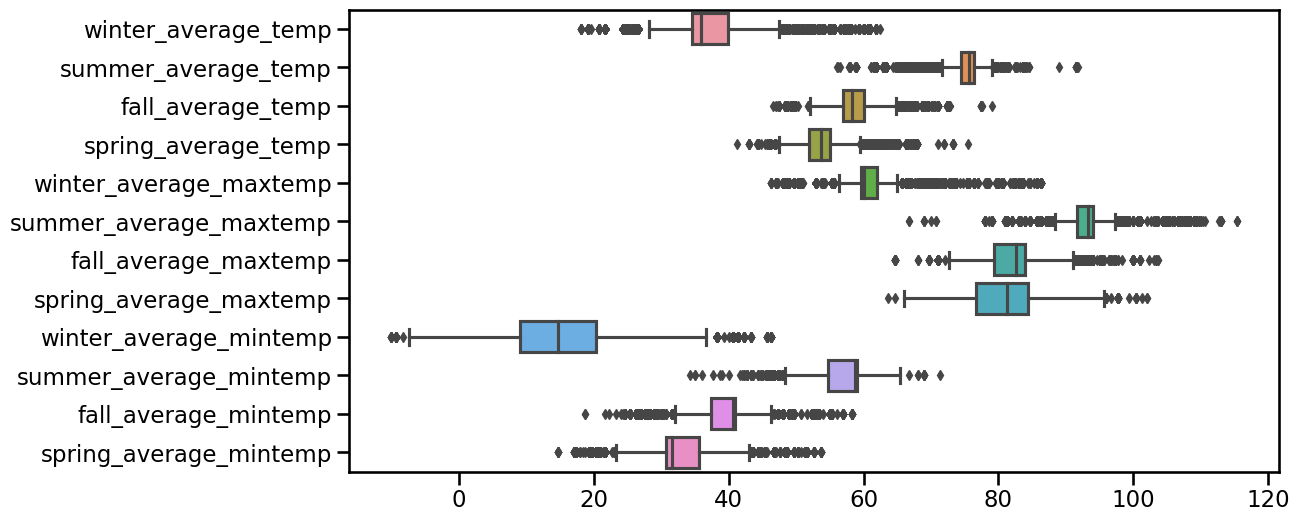

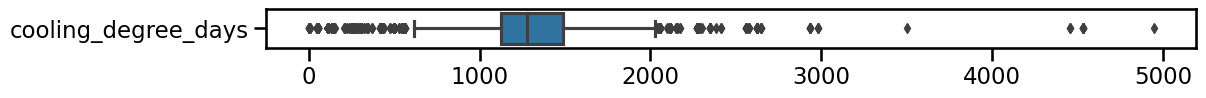

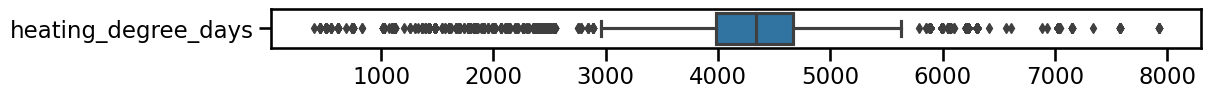

In [ ]:
#Para las variables que estan en escala °F

temp_variables=['winter_average_temp', 'summer_average_temp',
      'fall_average_temp', 'spring_average_temp', 'winter_average_maxtemp',
       'summer_average_maxtemp', 'fall_average_maxtemp',
       'spring_average_maxtemp', 'winter_average_mintemp',
       'summer_average_mintemp', 'fall_average_mintemp',
       'spring_average_mintemp']
boxplot_variabletype(temp_variables)
boxplot_variabletype(['cooling_degree_days'])
boxplot_variabletype(['heating_degree_days'])

Estas variables se gráficaron a su vez en tres ejes de referencia diferentes por la variación en el rango de la escala.

Del primer grupo referido a las estaciones, las que tienen una distribución más simetrica son las temperaturas promedio de cada estación. Comportamiento que no sucede con los valores maximos y minimos, excepto para valores minimos de invierno y maximos de primavera que tienen, a su vez, una dispersión más grande.
Las variables cooling_degree_days y heating_degree_days tienen apariencia simetrica y una dispersión pequeña.
Como podemos ver, todas presentan varios outliers.

##### Variables en días (_days_variables_)

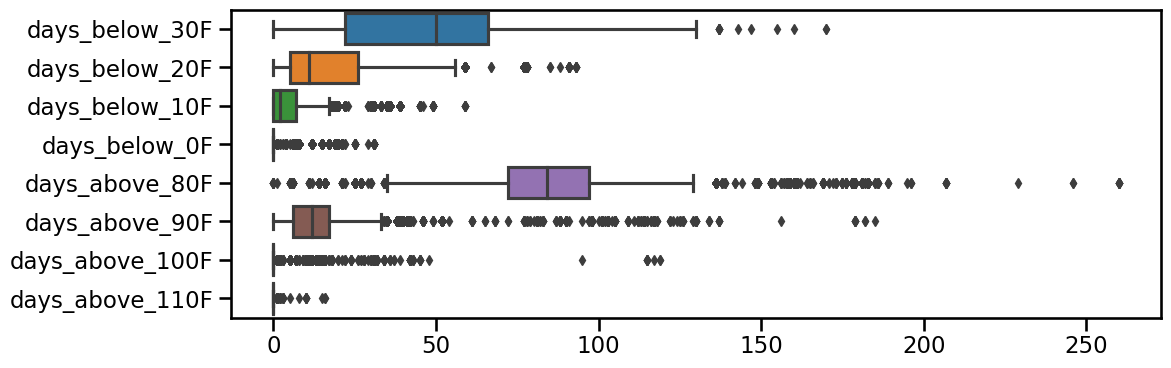

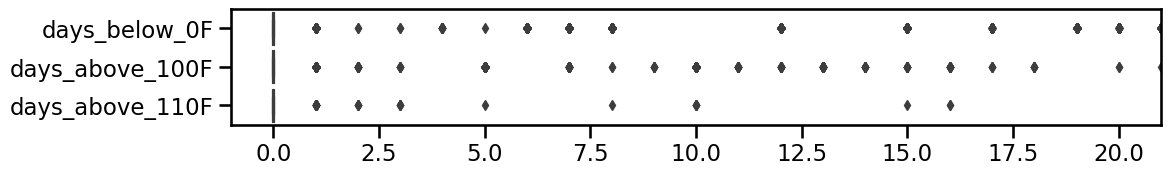

In [ ]:
days_variables=['days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
      'days_above_100F', 'days_above_110F']
boxplot_variabletype(days_variables)

days_variables_2=['days_below_0F', 'days_above_100F', 'days_above_110F']
boxplot_variabletype(days_variables_2, xlim_value=(-1, 21))


Como se observa en este último gráfico, las variables 'days_below_0F', 'days_above_100F y days_above_110F' presentan una gran cantidad de valores 0. Por lo tanto, los días que tienen una temperatura dentro de estos rangos son atípicos y no creemos que van a brindar información importante. Por este motivo, decidimos eliminar estas variables.

Por otro lado, 'days_below_20F' y 'days_below_10F' tienen una asimetría positiva y baja dispersión, mientras que el resto parecen ser simetricas con mayor dispersión.


##### Variables en pulgadas (_inches_variables_)

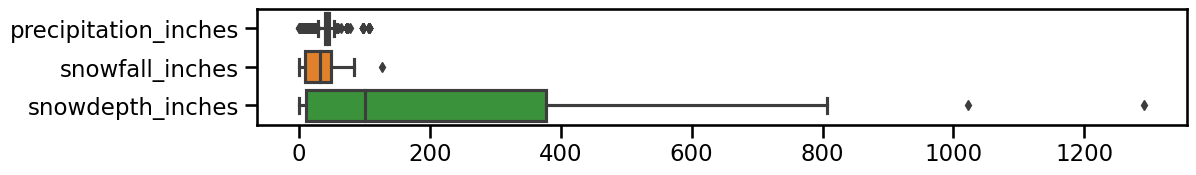

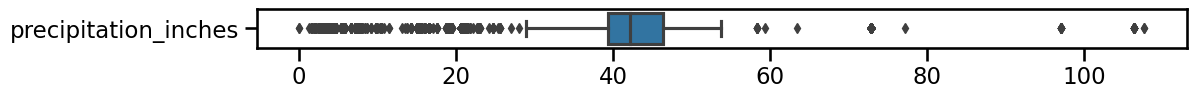

In [ ]:
inches_variables = ['precipitation_inches', 'snowfall_inches', 'snowdepth_inches']
boxplot_variabletype(inches_variables)
boxplot_variabletype(['precipitation_inches'])

Las variables 'precipitation_inches' y 'snowfall_inches' presentan baja dispersión y una distribución normal. Por otro lado, 'snowdepth_inches' presenta mayor dispersión y una asimetría positiva.

##### Variables de la edificación

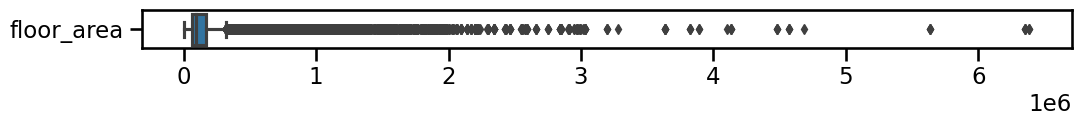

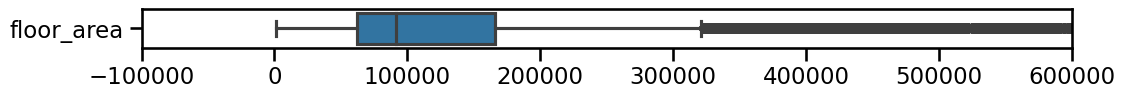

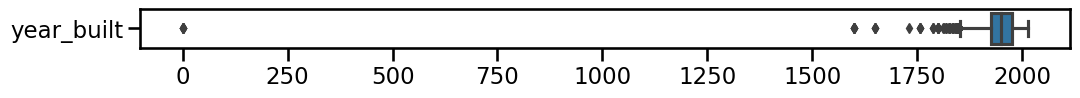

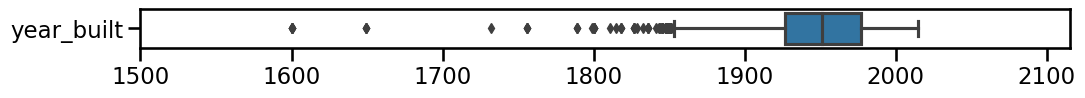

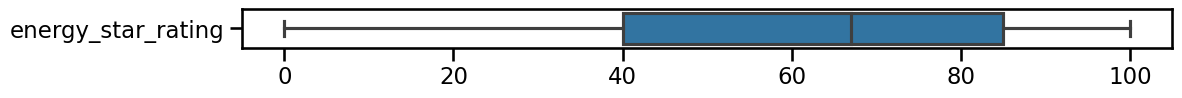

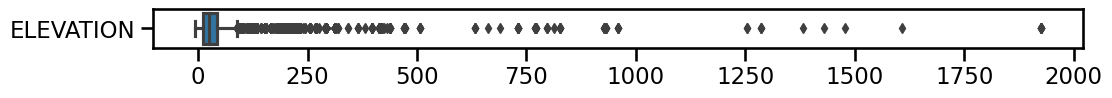

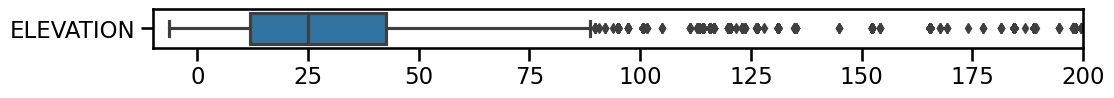

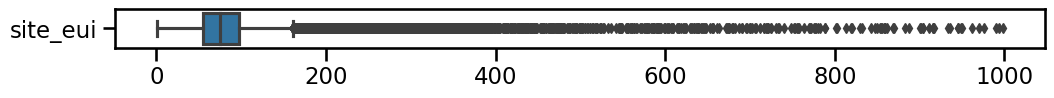

In [ ]:
boxplot_variabletype(['floor_area'])
boxplot_variabletype(['floor_area'], xlim_value = (-0.1e6,0.6e6))
boxplot_variabletype(['year_built'])
boxplot_variabletype(['year_built'], xlim_value = (1500, None))
boxplot_variabletype(['energy_star_rating'])
boxplot_variabletype(['ELEVATION'])
boxplot_variabletype(['ELEVATION'], xlim_value = (-10,200))
boxplot_variabletype(['site_eui'])


En general, se observa que son variables simétricas con excepción de 'floor_area', la cual presenta una asimetría positiva.

'floor_area' y 'site_eui' presentan una gran cantidad de valores atípicos.

###Búsqueda de correlación entre variables.

El siguiente análisis se hace con la intención de buscar cuales son las variables que tienen mayor correlación con la variable target. Cabe destacar que para mostrarlas en forma descendente, desde la que tiene mayor correlación a la que tiene menor se tomaron valores absolutos de las mismas. Dejando como paso siguiente definir si está correlación es negativa o positiva.

In [ ]:
numeric_variables = energy_df.select_dtypes(include='number')  # Selecionamos solo variables numéricas
# Calculamos la matriz de correlación
correlation_matrix = numeric_variables.corr()
# Filtramos la matriz para la columna "site_eui"
site_eui_correlation = correlation_matrix['site_eui']
# Desplegamos los resultados en valor absoluto y ordenadas descendentemente.
abs(site_eui_correlation).sort_values(ascending=False)


site_eui                     1.000000
energy_star_rating           0.511012
winter_average_temp          0.163560
snowfall_inches              0.157284
winter_average_mintemp       0.156144
heating_degree_days          0.147861
days_below_30F               0.139811
summer_average_temp          0.131333
spring_average_mintemp       0.129177
cooling_degree_days          0.125004
days_below_20F               0.119492
spring_average_temp          0.119226
precipitation_inches         0.113558
snowdepth_inches             0.113371
summer_average_mintemp       0.092247
winter_average_maxtemp       0.089367
days_above_80F               0.086347
days_below_10F               0.084296
fall_average_mintemp         0.075824
floor_area                   0.073967
spring_average_maxtemp       0.061644
days_below_0F                0.060981
days_with_fog                0.055388
fall_average_maxtemp         0.054740
days_above_100F              0.050029
summer_average_maxtemp       0.022143
year_built  

In [ ]:
site_eui_correlation.sort_values(ascending=False)

site_eui                     1.000000
snowfall_inches              0.157284
heating_degree_days          0.147861
days_below_30F               0.139811
summer_average_temp          0.131333
cooling_degree_days          0.125004
days_below_20F               0.119492
precipitation_inches         0.113558
snowdepth_inches             0.113371
summer_average_mintemp       0.092247
days_above_80F               0.086347
days_below_10F               0.084296
floor_area                   0.073967
days_below_0F                0.060981
fall_average_maxtemp         0.054740
summer_average_maxtemp       0.022143
year_built                   0.017162
direction_peak_wind_speed    0.013589
ELEVATION                    0.011798
max_wind_speed               0.010639
direction_max_wind_speed     0.010217
fall_average_temp            0.000012
days_above_90F              -0.007980
days_above_110F             -0.014190
days_above_100F             -0.050029
days_with_fog               -0.055388
spring_avera

<Axes: title={'center': 'Mapa de calor de la matriz de correlación'}>

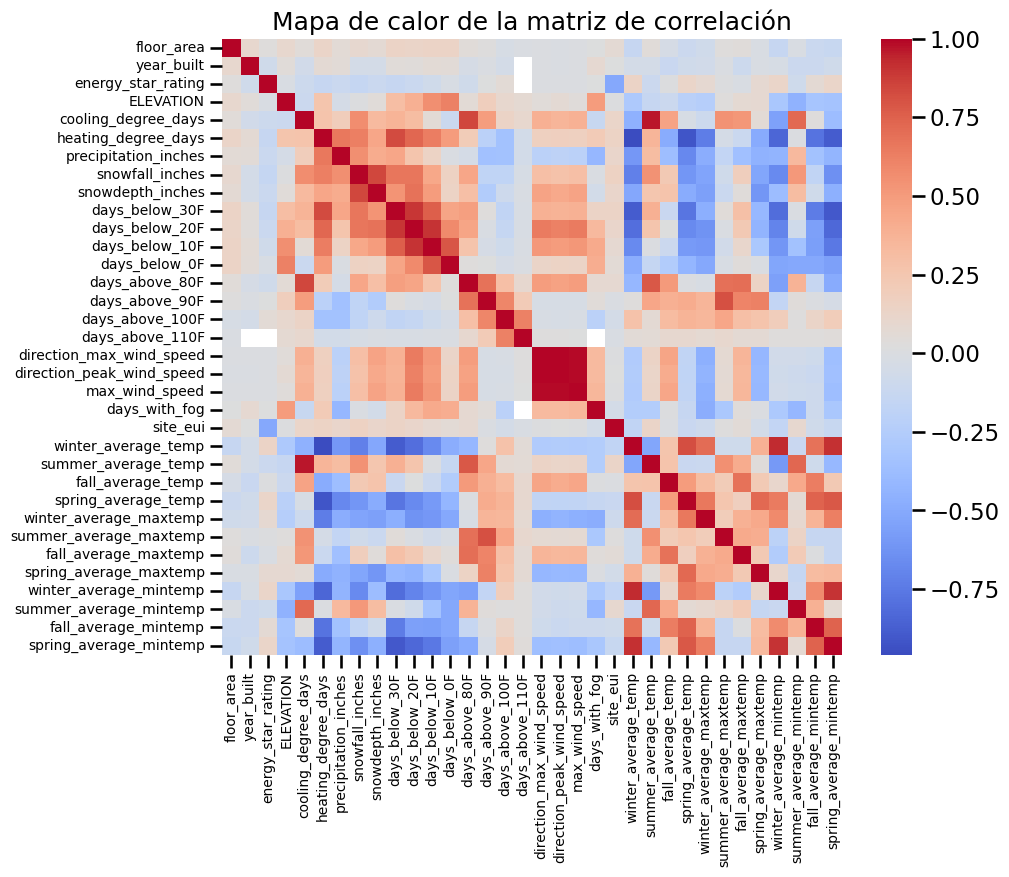

In [ ]:
# Crea el mapa de calor
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Mapa de calor de la matriz de correlación")
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

Con esta información ,lo que podemos hacer es decidir si es correcto o no reducir el número de variables.

Por ejemplo, podemos ver que la correlación entre 'days_below_30F' y 'days_below_20F' es alta, y a su vez, ambas tienen una correlación similar con la variable target de 0,14 y 0,12 respectivamente. Ya que ambas aportan información similar podríamos precindir de una de ellas.

Para realizar un analisis más global y eficiente a la vez, mediante esta reprentación podemos identificar grupos de variables que esten altamente relacionadas para luego dividir la base en estos dos grupos y eliminar información redundante.

En este caso observamos dos grupos grandes de varibales. El primero donde las variables presentan correlaciones altas y positivas (desde"Elevation" hasta "days above") y otro grupo con correlaciones altas y negativas (winter_average temperature hasta "spring_average_mintemp).  Lo cuál nos permite realizar el análisis  por separado para mediante el calculo de las correlaciones seleccionar las variables que mejor explique a nuestra target. Y una vez seleccionadas podamos realizar un PCA con menos cantidad de información redundante lo cual sería mas preciso para el calculo de las contribuciones.


#Conclusión
Para concluir dejamos resumidos los pasos a seguir para el entregable n° 2.

- Cambiar las unidades de las variables a unidades SI y traducción del inglés al español.
- Eliminar las variables direction_max_wind_speed, max_wind_speed, direction_peak_wind_speed y days_with_fog debido a que tienen menos del 50% de datos totales.
- Una vez seleccionadas las variables de trabajo, realizar los filtros necesarios para eliminar valores atípicos. Luego, realizar el escalado/estandarización necesarios para poder hacer PCA e imputación.
- Imputar valores para los faltantes de "year_built" y "energy_star_rating". Proponemos comparar diferentes técnicas de imputacion tanto las técnicas básicas como KNN.  
- Realizar encoding one-hot para el modelado de la variable categorica 'facility_type'
- Agrupar variables para conocer la correlación entre las mismas y poder reducir el df. Posteriormente, aplicar PCA.